**ANÁLISIS EXPLORATORIO**

**Definición del Problema:**

Dado el dataset de titanic armar un modelo predictivo usando un algortimo de aprendizaje automático.


**¿Que debemos encontrar?**

Deberia predeccir qué tipos de personas podrían sobrevivir.


**¿Como lo haremos?**
+ Para eso vamos a tener que análizar el dataset mediante un buen ánalisis exploratorio
    + Análisis Explotarorio
        + Importamos Librerías
            + Pandas
            + numpy
            + Visualización
                - seaborn
                - matplotlib
    + Ingeniería de Características
    + Implementar modelo de entrenamiento
        + Regresión Logística
        + KNeighborsClassifier
        + GaussianNB
        + DecisionTreeClassifier
        + Maquinas de Soporte Vectorial
        + Análisis de discriminante lineal
        + Análisis de discriminante cuadrático
    + Hiperparametros predeterminados de cada algoritmo
        + Aplicando GridSearchCV
        + Aplicando RandomSearchCV
        + Analisis de resultados
        + Aplicando hiperoptimización bayesiana
    + Predicción Final

In [78]:
# Importamos librerías
import pandas as pd
import numpy as np
import random as rnd

#Importamos librerías para visualización
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [79]:
pip install scikit-plot


In [80]:
import warnings
warnings.simplefilter("ignore")

In [81]:
from platform import python_version

print("Python versión",python_version())
print("Seaborn versión",sns.__version__)
print("Pandas versión",pd.__version__)
print("Numpy versión",np.__version__)

# En mi caso use estas:
#   Python versión 3.10.10
#   Seaborn versión 0.12.2
#   Pandas versión 2.0.2
#   Numpy versión 1.22.4


Python versión 3.10.12
Seaborn versión 0.12.2
Pandas versión 1.5.3
Numpy versión 1.23.5


**Ingesta de los datos**

In [82]:
#Leemos los dataset
train_df = pd.read_csv('titanic_train.csv') #Dataset de entrenamiento
test_df = pd.read_csv('titanic_test.csv') #Dataset de prueba
combine = [train_df, test_df]

**Exploramos las dimensiones del data set**
Tenemos
+ Id del Pasajero
+ Survived
+ La clase a la que pertenece el pasajero
+ Nombre
+ Sexo
+ Edad
+ SibSb - Number of Siblings/Spouses Aboard
+ Parch - Number of Parents/Children Aboard
+ Ticket
+ Fare
+ Cabin
+ Embarcado

Mirando las dimensiones podemos observar que tenemos una etiqueta Survived que nos indica si el pasajero sobrevivió o no. Relacionando con la pregunta que formulé al principio, el dataset podría responder que chances hay que un pasajero sobreviva con las dimensiones que tiene el dataset.-

In [83]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Preguntas que me voy a hacer con el dataset:**

1 - Categóricas vs Numéricas

+ ¿Cuáles son las dimensiones categóricas?
    + Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

+ ¿Cuáles son las características numéricas?
    + Continous: Age, Fare. Discrete: SibSp, Parch.

In [84]:
#Como vemos los tipos de datos del dataset
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [85]:
#Muestro las 100 primeras filas del dataset
train_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


**1.- Revisando la salida puedo preguntarme:**

**¿Qué características son tipos de datos mixtos?**

Datos numéricos y alfanuméricos dentro de la misma función. Estos son candidatos para corregir.

*Ticket* es una combinación de tipos de datos numéricos y alfanuméricos. La *cabina* es alfanumérica.

**¿Qué características pueden tener errores tipográficos?**

Esto es más difícil de revisar para un conjunto de datos grande, sin embargo, revisar algunas muestras de un conjunto de datos más pequeño puede decirnos directamente qué características pueden requerir corrección.

La característica nombre puede tener errores tipográficos, ya que hay varias formas de describir un nombre, incluidos títulos, corchetes y comillas para nombres alternativos o cortos.

In [86]:
#Muestro las ultimas filas del datset
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**2.- Limpeza de los datos**

Valores nulos, blancos, vacíos

+ ¿Cuáles son las características que tienen valores nulos, blancos o vacios?

Vamos a tener que corregirlo.

* Las dimensiones *Cabin*, *Age*, *Embarqued* tienen valores nulos en el Set de Entrenamiento

* Las dimensiones *Cabin*, *Age* tienen datos incompletos en el Set de Prueba.


+ ¿Cuáles son los tipos de datos para varias funciones?

Siete características son números enteros o flotantes. Seis en el caso de un conjunto de datos de prueba.
Cinco características son cadenas (objeto).

In [87]:
#Dataset train
#¿Como vemos que caracateristicas (columnas) tienen valores nulos?
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
#Dataset test
#¿Como vemos que caracateristicas (columnas) tienen valores nulos?
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [89]:
#Como muestro información extendidad de cada tataset
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
print('_'*40)
test_df.info()

________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


*Observar que muestra los valores nulos aqui tambien*

**¿Cuál es la distribución de valores de características numéricas en las muestras?**

Esto nos ayuda a determinar, entre otras ideas iniciales, qué tan representativo es el conjunto de datos de entrenamiento del dominio del problema real.

Las muestras totales son 891 o el 40% del número real de pasajeros a bordo del Titanic (2224).

Sobrevivido (*Survived*) es una característica categórica con valores 0 o 1.

Alrededor del 38% de las muestras sobrevivieron representativa de la tasa de supervivencia real al 32%.

La mayoría de los pasajeros (> 75%) no viajaron con padres o hijos.

Casi el 30% de los pasajeros tenían hermanos y / o cónyuge a bordo.

Las tarifas variaron significativamente y pocos pasajeros (<1%) pagaron hasta $ 512.

Pocos pasajeros de edad avanzada (<1%) con edades comprendidas entre los 65 y los 80 años.

**¿Cuál es la distribución de características categóricas?**

Los nombres son únicos en todo el conjunto de datos (recuento = único = 891)

Característica Género con dos valores posibles con 65% de hombres (arriba = hombres, frecuencia = 577 / recuento = 891).

Los valores de la característica cabina tienen varios duplicados en las muestras.

Alternativamente, varios pasajeros compartieron una cabina.

Embarked toma tres valores posibles.

Puerto S utilizado por la mayoría de los pasajeros (arriba = S)

La característica de ticket tiene una alta proporción (22%) de valores duplicados (único = 681).

In [91]:
#Para lo anterior usamos la descripción estadistica del dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


train_df.dscribe(include = ['O'])
Esta instrucción extrae los atributos dtypes de los objetos y muestra su recuento / frecuencia / máx. / cuartiles

In [92]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Análisis de Datos:**

**Correlación**

Objetivo: Observar como las caracteristicas se correlacionan con el target Survival.

**Completando** Valores Nulos

+ Es posible que deseemos completar la caracteristica Edad, ya que definitivamente está correlacionada con la supervivencia.
+ Es posible que deseemos completar la caracteristica Embarcado, ya que también puede correlacionarse con la supervivencia u otra función importante.

**Depuración de Dimensiones no Relevantes**.

La función Ticket puede eliminarse de nuestro análisis ya que contiene una alta proporción de duplicados (22%) y es posible que no haya una correlación entre Ticket y supervivencia.
La característica de cabina puede descartarse porque está muy incompleta o contiene muchos valores nulos tanto en el conjunto de datos de entrenamiento como de prueba.
PassengerId puede eliminarse del conjunto de datos de entrenamiento ya que no contribuye a la supervivencia.
La característica de nombre es relativamente no estándar, puede que no contribuya directamente a la supervivencia, por lo que tal vez se elimine.

**Creando**

+ Es posible que deseemos crear una nueva caracteristica llamada Familia basada en Parch y SibSp para obtener el recuento total de miembros de la familia a bordo.
+ Es posible que deseemos diseñar la caracteristica Nombre para extraer Título como una función nueva.
+ Es posible que queramos crear una nueva caracteristica para las bandas de edad. Esto convierte una característica numérica continua en una característica categórica ordinal**
+ También es posible que deseemos crear una caracteristica de rango de tarifa si ayuda a nuestro análisis.

**Clasificando**

También podemos agregar a nuestras suposiciones basándonos en la descripción del problema mencionada anteriormente.

Las mujeres (sexo = mujer) tenían más probabilidades de haber sobrevivido.
Los niños (edad <?) Tenían más probabilidades de haber sobrevivido.
Los pasajeros de clase alta (Pclass = 1) tenían más probabilidades de haber sobrevivido.

**Analizar mediante funciones pivotantes**

Para confirmar algunas de nuestras observaciones y suposiciones, podemos analizar rápidamente nuestras correlaciones de características haciendo pivotar las características entre sí. Solo podemos hacerlo en esta etapa para las características que no tienen valores vacíos. También tiene sentido hacerlo solo para características que son de tipo categórico (Género), ordinal (Pclass) o discreto (SibSp, Parch).

Pclass Observamos una correlación significativa (> 0.5) entre Pclass = 1 y Survived. Decidimos incluir esta característica en nuestro modelo.
Gérero confirmamos la observación durante la definición del problema de que Género = mujer tuvo una tasa de supervivencia muy alta del 74%.

SibSp y Parch Estas características tienen una correlación cero para ciertos valores. Puede ser mejor derivar una característica o un conjunto de características a partir de estas características individuales.


In [93]:
#Agrupo por Pclass (clase) y calcula la media de Survived (sobrevivio)
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [94]:
#Agrupo por Sex (sexo) y calcula la media de Survived (sobrevivio)
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [95]:
#Agrupo por sibsp y calcula la media de Survived (sobrevivio)
#sibsp : Número de hermanas / cónyuges a bordo
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#Tienen correlación cero para algunos valores, generaremos una nueva caracteristica
# combinada con esta y otra. Para mejorar el procesamiento

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [96]:
#Agrupo por Parch y calcula la media de Survived (sobrevivio)
#Parch : Número de padres/niños a bordo
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Similar comportamiento a la anterior, tienen correlación cero para algunos valores,
# generaremos una nueva caracteristica combinada con esta y otra.
# Para mejorar el procesamiento.

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Analisis mediantes Visualizaciones**

Ahora podemos continuar confirmando algunas de nuestras suposiciones utilizando visualizaciones para analizar los datos.

**Correlacionar características numéricas**

Comencemos por comprender las correlaciones entre las características numéricas y con nuestra target Survived.

Un gráfico de histograma es útil para analizar variables numéricas continuas como Edad, donde las bandas o rangos ayudarán a identificar patrones útiles. El histograma puede indicar la distribución de muestras utilizando contenedores definidos automáticamente o bandas de igual rango. Esto nos ayuda a responder preguntas relacionadas con bandas específicas (¿Hay alguna edad que tuvo mejor tasa de supervivencia?)

Tengamos en cuenta que el eje x en las visualizaciones de historgrama representa el recuento de muestras o pasajeros.

**Observaciones**

+ Los bebés (edad <= 4) tuvieron una alta tasa de supervivencia.
+ Los pasajeros más viejos (edad = 80) sobrevivieron.
+ Un gran número de jóvenes de 15 a 25 años no sobrevivió.
+ La mayoría de los pasajeros tienen entre 15 y 35 años.

**Decisiones**

Confirma que la característca edad es relevante que esté en el set de entreamiento. Entonces,
+ Incluimos Edad en el modelo de entrebamiento
+ Completar los valores nulos de Edad
+ Podríamos agrupar rangos de edad

**Comparo mediante un Gráfico de Histograma característica Age con Survived**

'1.23.5'

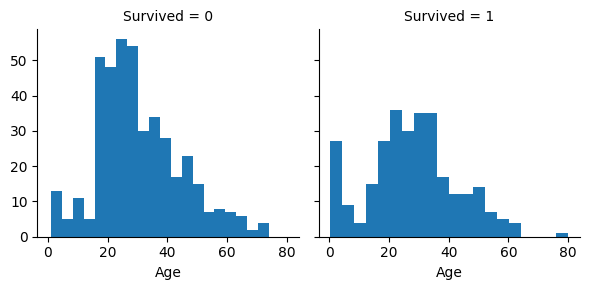

In [97]:
#Usamos la librería seaborn
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
np.__version__
# warnings.filterwarnings('ignore') #ignoro warnings con valores nulos

**Comparo mediante un Gráfico de Histograma característica Pclass con Survived**

**Observaciones**

Pclass = 3 tenía la mayoría de los pasajeros, sin embargo, la mayoría no sobrevivió.

La mayoría de los pasajeros bebés de Pclass = 2 y Pclass = 3 sobrevivieron.

La mayoría de los pasajeros de Pclass = 1 sobrevivieron.

Pclass varía en términos de distribución por edad de los pasajeros.

**Decisiones**

Tomar la característica Pclass para el entrenamiento de modelos.

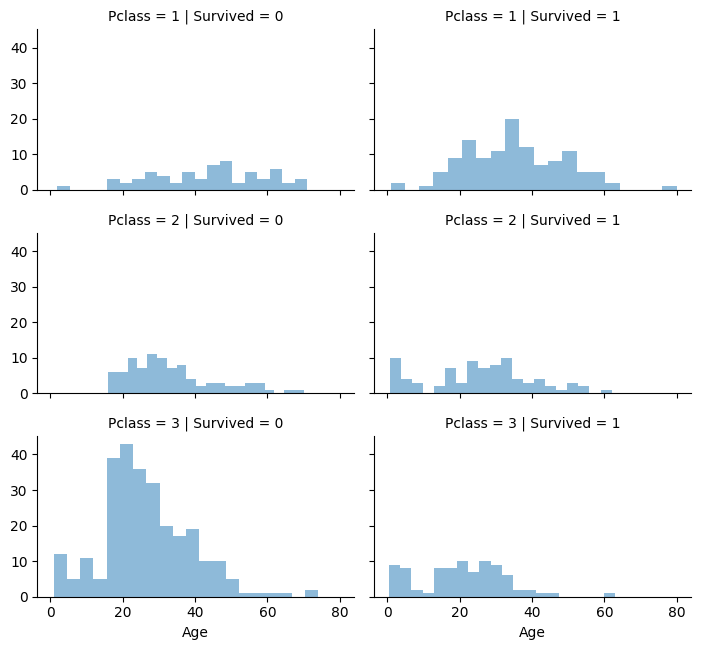

In [98]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
#np.warnings.filterwarnings('ignore')
# np.seterr(all='ignore') #ignoro warnings con valores nulos

**Correlacionar características categóricas**

**Observaciones**

Las mujeres tenian una tasa de supervivencia mucho mejor que los hombres.

Excepción en Embarked = C donde los hombres tuvieron una mayor tasa de supervivencia.

Esto podría ser una correlación entre Pclass y Embarked y, a su vez, Pclass y Survived, no necesariamente una correlación

directa entre Embarked y Survived.

Los hombres tuvieron una mejor tasa de supervivencia en Pclass = 3 en comparación con Pclass = 2 para los puertos C y Q.

Los puertos de embarque tienen diferentes tasas de supervivencia para Pclass = 3 y entre pasajeros masculinos.

**Decisiones**
+ Tomar la característica Género al entrenamiento de modelos.

+ Completar y agreguar la característica Embarked al entrenamiento de modelos.

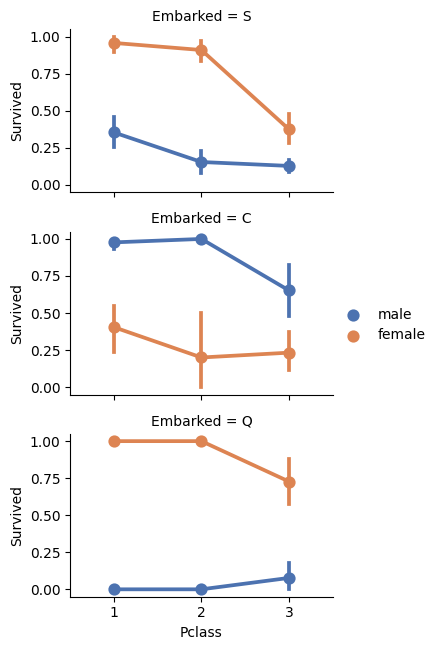

In [99]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
#np.warnings.filterwarnings('ignore') #ignoro warnings con valores nulos
#np.seterr(all="ignore")


**Correlacionar características categóricas y numéricas**

También es posible que deseemos correlacionar características categóricas (con valores no numéricos) y características numéricas.

Podemos considerar correlacionar Embarcado (categórico no numérico), Sexo (categórico no numérico), Tarifa (numérico continuo), con Sobrevivido (categórico numérico).

**Observaciones**

Los pasajeros que pagan tarifas más altas tienen una mejor supervivencia. Confirma nuestra suposición para crear rangos de tarifas.

El puerto de embarque se correlaciona con las tasas de supervivencia.

**Decisiones**

Se podría bandas a la característica tarifa.

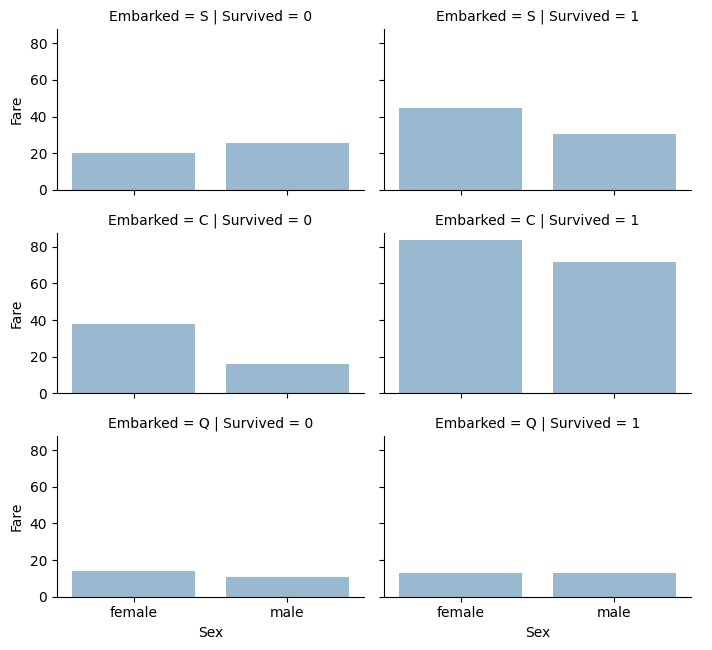

In [100]:
#grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
#np.warnings.filterwarnings('ignore') #ignoro warnings con valores nulos

Tenemos varias suposiciones y decisiones con respecto a nuestros conjuntos de datos y requisitos de solución.
Hasta ahora no tuvimos que cambiar características o valores.
Vamos a ejecutar decisiones y suposiciones para corregir, crear y completar datos.

Corregir eliminando características
Este es un buen objetivo inicial para ejecutar. Al eliminar características, estamos tratando con menos puntos de datos. Acelera nuestro portátil y facilita el análisis.

Basándonos en nuestras suposiciones y decisiones, queremos eliminar las características de Cabina y Ticket.

Las operaciones se realizan en conjuntos de datos de prueba y entrenamiento juntos para mantener la coherencia.

In [101]:
#Muestro como estan nuestros dataset antes de eliminar columnas
print("Antes", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

#Eliminamos la columna Ticket y Cabin del set de entrenamiento
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
#Eliminamos la columna Ticket y Cabin del set de prueba
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
#Creamos una lista con dos elementos, uno el dataset train y el otro con test
combine = [train_df, test_df]

"Despues", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Antes (891, 12) (418, 11) (891, 12) (418, 11)


('Despues', (891, 10), (418, 9), (891, 10), (418, 9))

**Creando nueva característica extrayendo de existente**

Voy a analizar la característica Nombre se puede diseñar para extraer títulos y probar la correlación entre los títulos y la supervivencia, antes de eliminar las funciones Nombre y PassengerId.

En el siguiente código, extraigo la característica de Título usando una expresión regular.

El patrón de expresión regular (\ w + \.) Coincide con la primera palabra que termina con un carácter de punto dentro de la característica Nombre. El flag expand = False devuelve un DataFrame.

**Observaciones**

Cuando graficamos Título, Edad y Sobrevivido, observamos las siguientes observaciones.

La mayoría de los títulos clasifican los grupos de edad con precisión. Por ejemplo: el título de maestro tiene una edad media de 5 años.
La supervivencia entre las bandas de Título de Edad varía ligeramente.
Ciertos títulos sobrevivieron en su mayoría (Mme, Lady, Sir) o no (Don, Rev, Jonkheer).

**Decisión**

Conservo la nueva característica título para el entrenamiento de modelos.

In [102]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Vemos que son muchos, entonces, podemos reemplazar muchos títulos con un nombre más común o clasificarlos como Raros.

In [103]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Podemos convertir los títulos categóricos a ordinales.

In [104]:
#Creamos un diccionario tittle_mapping que mapeara cada título categórico a ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Ahora podemos eliminar de forma segura la función Nombre de los conjuntos de datos de entrenamiento y prueba. Tampoco necesitamos la dimensión PassengerId en el conjunto de datos de entrenamiento.

In [105]:
#Eliminamos las columnas Name y PassengerId del dataset de entrenamiento
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
#Eliminamos las columnas Name y PassengerId del dataset de prueba
test_df = test_df.drop(['Name'], axis=1)

#Unimos los dos dataset en una lista
combine = [train_df, test_df]

#Mostramos las dimensiones de cada dataset
train_df.shape, test_df.shape

((891, 9), (418, 9))

**Conversión característica categórica Género**

Convierto la Dimensión Género donde mujer = 1 y hombre = 0.

In [106]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**Completar una función continua numérica**

Deberíamos comenzar a estimar y completar características con valores faltantes o nulos.

+ Primero dimensión Age.

Podemos considerar tres métodos para completar una característica continua numérica.

1. Una forma sencilla es generar números aleatorios entre la media y la desviación estándar.

2. Una forma más precisa de adivinar los valores perdidos es utilizar otras características correlacionadas. En nuestro caso, notamos correlación entre Edad, Sexo y Clase P.

3. Adivine los valores de Edad utilizando valores de mediana para Edad en conjuntos de combinaciones de características Pclass y Sexo. Entonces, la edad media para Pclass = 1 y Sexo = 0, Pclass = 1 y Sexo = 1, y así sucesivamente ...

Combine los métodos 1 y 2. Entonces, en lugar de adivinar valores de edad basados en la mediana, use números aleatorios entre la media y la desviación estándar, basados ​​en conjuntos de combinaciones de Pclass y Sexo.

Los métodos 1 y 3 introducirán ruido aleatorio en nuestros modelos. Los resultados de varias ejecuciones pueden variar. Voy por el método 2.

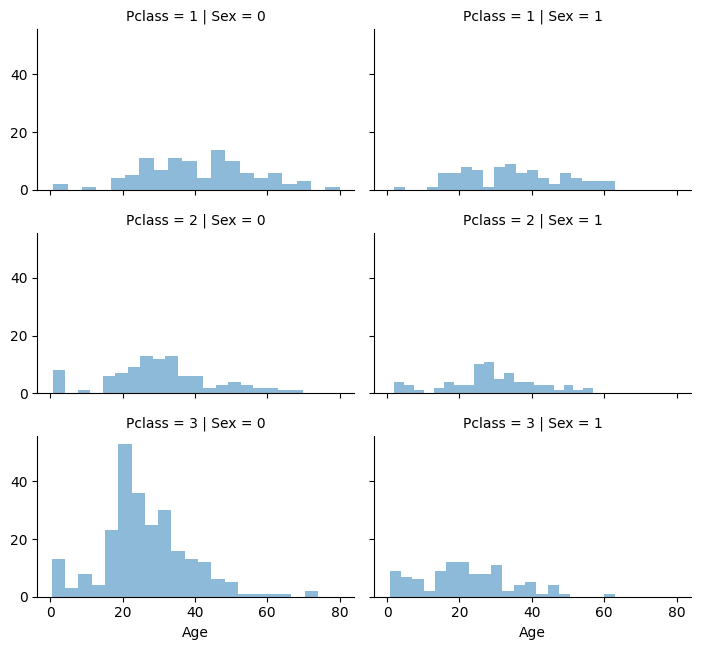

In [107]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
#np.warnings.filterwarnings('ignore') #ignoro warnings con valores nulos

Comencemos por preparar una matriz vacía para contener valores de edad adivinados basados ​​en combinaciones de Pclass x género.

In [108]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Podemos iterar sobre la dimensión Sex (0 ó 1) y Pclass (1, 2, 3) para calcular los valores de Age para las 6 combinaciones.

In [109]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [110]:
#train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Crear nueva característica combinando características existentes Podemos crear una nueva característica para FamilySize que combine Parch y SibSp. Esto nos permitirá eliminar Parch y SibSp de nuestros conjuntos de datos.

In [111]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Podemos crear otra característica que se llame IsAlone.

In [112]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Dejemos las características de Parch, SibSp y FamilySize en favor de IsAlone

In [113]:
#Eliminamos las columnas Parch, SibSp y FamilySize del dataset de entrenamiento
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
#Eliminamos las columnas Parch, SibSp y FamilySize del dataset de prueba
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
#Combinamos en una lista
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22,7.2500,S,1,0
1,1,1,1,38,71.2833,C,3,0
2,1,3,1,26,7.9250,S,2,1
3,1,1,1,35,53.1000,S,3,0
4,0,3,0,35,8.0500,S,1,1


También podemos crear una característica combinando Pclass y Age.

In [114]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,66,22,3
1,38,38,1
2,78,26,3
3,35,35,1
4,105,35,3
5,75,25,3
6,54,54,1
7,6,2,3
8,81,27,3
9,28,14,2


In [115]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

La característica embarcada toma valores S, Q, C según el puerto de embarque. Nuestro conjunto de datos de entrenamiento tiene dos valores perdidos. Simplemente los llenamos con la ocurrencia más común.

In [116]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Podemos convertir la característica Embarked creando una nueva caracteística de puerto numérico.

In [117]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,22,7.2500,0,1,0,66
1,1,1,1,38,71.2833,1,3,0,38
2,1,3,1,26,7.9250,0,2,1,78
3,1,1,1,35,53.1000,0,3,0,35
4,0,3,0,35,8.0500,0,1,1,105


Ahora podemos completar la cRcterística Fare (Tarifa) para el valor faltante único en el conjunto de datos de prueba usando el modo para obtener el valor que ocurre con más frecuencia para esta característica.

También es posible que deseemos redondear la tarifa a dos decimales, ya que representa la moneda.

In [118]:
#Una forma de remplazar valores faltantes es cacular la mediana y reemplazar por esta
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,34,7.8292,2,1,1,102
1,893,3,1,47,7.0000,0,3,0,141
2,894,2,0,62,9.6875,2,1,1,124
3,895,3,0,27,8.6625,0,1,1,81
4,896,3,1,22,12.2875,0,3,0,66


Tenga en cuenta que no estamos creando una nueva característica intermedia ni realizando ningún análisis adicional de correlación para adivinar la característica faltante, ya que solo reemplazamos un valor. El objetivo es no tener valores nulos

En función a los valores de la característa Fare (Tarifa) voy a crear bandas de tarifas para que quede más limpio el dataset

In [119]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convierto la característica de tarifa a valores ordinales basados en la banda de tarifa.

In [120]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,22,0,0,1,0,66
1,1,1,1,38,3,1,3,0,38
2,1,3,1,26,1,0,2,1,78
3,1,1,1,35,3,0,3,0,35
4,0,3,0,35,1,0,1,1,105
5,0,3,0,25,1,2,1,1,75
6,0,1,0,54,3,0,1,1,54
7,0,3,0,2,2,0,4,0,6
8,1,3,1,27,1,0,3,0,81
9,1,2,1,14,2,1,3,0,28


Y en el dataset de Test

In [121]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,34,0,2,1,1,102
1,893,3,1,47,0,0,3,0,141
2,894,2,0,62,1,2,1,1,124
3,895,3,0,27,1,0,1,1,81
4,896,3,1,22,1,0,3,0,66
5,897,3,0,14,1,0,1,1,42
6,898,3,1,30,0,2,2,1,90
7,899,2,0,26,2,0,1,0,52
8,900,3,1,18,0,1,3,1,54
9,901,3,0,21,2,0,1,0,63


**MODELO DE ENTRENAMIENTO**

Queremos identificar la relación entre la salida (sobrevivido o no) con otras variables o características (género, edad, puerto ...).
También estamos realizando una categoría de aprendizaje automático que se llama aprendizaje supervisado, ya que entrenamos nuestro modelo con un conjunto de datos determinado.
Con estos dos criterios: aprendizaje supervisado más clasificación

+ Regresión Logística
+ KNN or k-Nearest Neighbors
+ Naive Bayes classifier
+ Decision Tree
+ Máquinas de Soporte Verctorial (SVM)
+ Analisis Discriminante Lineal
+ Analisis Discriminante Cuadrático


Preparamos las variables independiente y dependientes.

In [122]:
# Creamos las variables independiete y dependiente solo con el set de ENTRENAMIENTO
X = train_df.drop("Survived", axis=1) #Variable independiente (todas las columnas menos 'Survived')
Y = train_df["Survived"] #Variable dependiente (solo columna 'Survived')
X.shape, Y.shape

((891, 8), (891,))

In [123]:
# Dividimos el dataset en training y test (NO CONFUDIR CON EL SET titanic_test)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [124]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((623, 8), (623,), (268, 8), (268,))

***Probando varios modelos para el entrenamiento***

Seleccionamos siete algoritmos para realizar el trabajo.

Cada uno de estos modelos será una columna diferente en nuestra tabla de resultados:

1. Regresión Logistica
2. KNN - Vecinos Cercanos
3. Naives Bayes
4. Decision Tree
5. Máquina de Soporte Vectorial
6. Analisis Discriminante Lineal
7. Analisis Discriminante Cuadrático

In [125]:
#Dataframe de resultados
cols = ['Caso','Regresion Logistica','KNN','Naives Bayes','Decision Tree','SVM','LDA','QDA']

resul = pd.DataFrame(columns=cols)
resul.set_index("Caso",inplace=True)
resul.loc['Standard'] = [0,0,0,0,0,0,0]
resul.loc['GridSearch'] = [0,0,0,0,0,0,0]
resul.loc['RandomSearch'] = [0,0,0,0,0,0,0]
resul.loc['Hyperopt'] = [0,0,0,0,0,0,0]
resul.head()

,Regresion Logistica,KNN,Naives Bayes,Decision Tree,SVM,LDA,QDA
Caso,,,,,,,
Standard,0,0,0,0,0,0,0
GridSearch,0,0,0,0,0,0,0
RandomSearch,0,0,0,0,0,0,0
Hyperopt,0,0,0,0,0,0,0


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


**Hiperparametros predeterminados de cada algoritmo**

In [127]:
#Creación de Modelos
modelo_logreg   = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier()
gaussian   = GaussianNB()
decision_tree    = DecisionTreeClassifier()
svm_lineal   = SVC(gamma='auto')
LDA_clasificador = LinearDiscriminantAnalysis()
QDA_clasificador = QuadraticDiscriminantAnalysis()

modelos = [modelo_logreg, knn, gaussian, decision_tree, svm_lineal, LDA_clasificador, QDA_clasificador]

col = 0
for modelo in modelos:
    modelo.fit(X_train,Y_train.values.ravel())
    resul.iloc[0,col] = modelo.score(X_test,Y_test)
    col += 1

resul.head()

,Regresion Logistica,KNN,Naives Bayes,Decision Tree,SVM,LDA,QDA
Caso,,,,,,,
Standard,0.794776,0.742537,0.768657,0.802239,0.791045,0.776119,0.776119
GridSearch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RandomSearch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hyperopt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Aplicación de GridSearchCV**

“El algoritmo GridSearchCV funciona probando todas las combinaciones posibles de parámetros que se desean probar en el modelo. Cada uno de esos parámetros se prueba en una serie de iteraciones de validación cruzada (Cross Validation). Esta técnica ha estado en boga durante los últimos años como una forma de afinar los modelos ”⁴.

Ahora debemos definir un diccionario con los diferentes parámetros y sus valores para cada algoritmo

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#Regresión logistica
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#KNN
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

#Naive Bayes
naive_grid = dict()

#Decision Tree
criterion = ['gini','entropy']
splitter = ['best','random']
dtree_grid = dict(criterion=criterion,splitter=splitter)

#SVM
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
svc_grid = dict(kernel=kernel,C=C,gamma=gamma)


#LDA
solvers = ['svg', 'lsqr','eigen']
lda_grid = dict(solver=solvers)


#QDA
qda_grid = dict()

Luego aplicamos GridSearch a cada uno

In [129]:
modelos = [modelo_logreg, knn, gaussian, decision_tree, svm_lineal, LDA_clasificador, QDA_clasificador]
grids = [lr_grid, knn_grid, naive_grid, dtree_grid, svc_grid, lda_grid, qda_grid]
col = 0


for ind in range(0,len(modelos)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    grid_search = GridSearchCV(estimator=modelos[col],
                  param_grid=grids[col], n_jobs=-1, cv=cv,
                  scoring='accuracy',error_score=0)
    grid_clf_acc = grid_search.fit(X_train, Y_train)
    resul.iloc[1,col] = grid_clf_acc.score(X_test,Y_test)
    col += 1

resul.head()

,Regresion Logistica,KNN,Naives Bayes,Decision Tree,SVM,LDA,QDA
Caso,,,,,,,
Standard,0.794776,0.742537,0.768657,0.802239,0.791045,0.776119,0.776119
GridSearch,0.794776,0.776119,0.768657,0.798507,0.794776,0.776119,0.776119
RandomSearch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hyperopt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Aplicación de RandomSearchCV**

“Randomized Search. Considere que probar todas las combinaciones posibles (de hiperparámetros) requieren mucha fuerza bruta computacional. Los científicos de datos son un grupo impaciente, por lo que adoptaron una técnica más rápida: muestrear al azar a partir de una variedad de parámetros. La idea es que se cubrirá el conjunto de parámetros casi óptimo más rápido que utilizando el GridSearch. Esta técnica, sin embargo, es ingenua (naive). No sabe ni recuerda nada de sus ejecuciones anteriores ". ⁴

In [130]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

col = 0
for ind in range(0,len(modelos)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,
                                 random_state=1)
    n_iter_search = 3
    random_search = RandomizedSearchCV(modelos[col],
    param_distributions=grids[col],n_iter=n_iter_search, cv=cv)
    random_search.fit(X_train,Y_train)
    resul.iloc[2,col] = random_search.score(X_test,Y_test)
    col += 1

resul.head()

,Regresion Logistica,KNN,Naives Bayes,Decision Tree,SVM,LDA,QDA
Caso,,,,,,,
Standard,0.794776,0.742537,0.768657,0.802239,0.791045,0.776119,0.776119
GridSearch,0.794776,0.776119,0.768657,0.798507,0.794776,0.776119,0.776119
RandomSearch,0.805970,0.742537,0.768657,0.791045,0.783582,0.776119,0.776119
Hyperopt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Analizando los resultados**

Hasta ahora, si revisamos la cuadrícula de resultados, encontramos que la aplicación de técnicas de búsqueda automatizada ha dado buenos resultados.

<img src="tabla.png">


Obviamente los resultados pueden variar en sus ejecuciones.

Pero deberia verse la mejora amedida que emplean metodos de búsqueda optima de hiperparametros.

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

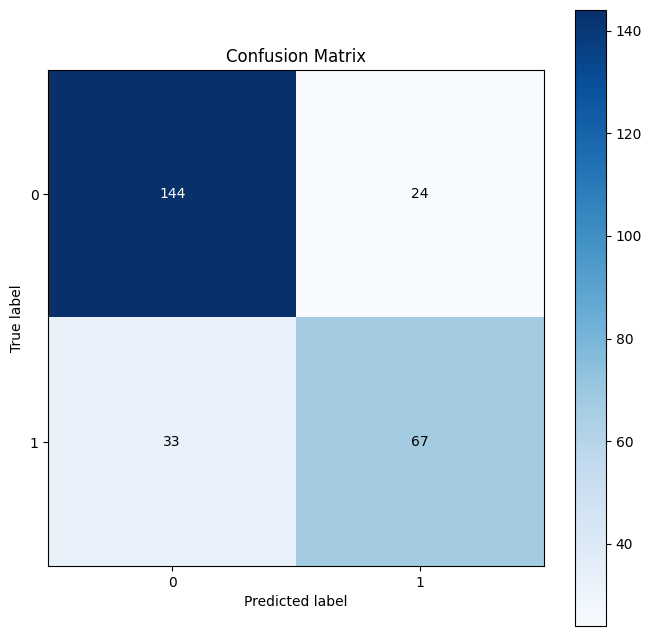

In [131]:
from sklearn.metrics import confusion_matrix

import scikitplot as skplt


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,
                             random_state=1)
n_iter_search = 3
grid_search = GridSearchCV(estimator=decision_tree,
                           param_grid=dtree_grid,
                           n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_win = grid_search.fit(X_train, Y_train)

#Valores predichos basados en los nuevos parametros
yv_pred = grid_win.predict(X_test)

#print(confusion_matrix(Y_test, yv_pred))
skplt.metrics.plot_confusion_matrix(Y_test, yv_pred,figsize=(8,8))


Conozcamos los hiperparámetros encontrados en esta versión del algoritmo.

Lo haremos utilizando lo siguiente:

In [132]:
print("Mejor: %f usando %s" % (grid_win.best_score_, grid_win.best_params_))

Mejor: 0.772572 usando {'criterion': 'entropy', 'splitter': 'random'}


**Aplicación de hiperoptimización bayesiana con la biblioteca Hyperopt.**

Ajuste de hiperparámetros

In [133]:
#Importaciones básicas
from tqdm import tqdm
import time

#Importaciones generales de Sklearn
from sklearn.model_selection import cross_val_score

#Importamos Hyperopt
import hyperopt as hp
from hyperopt import fmin, tpe, Trials, hp, STATUS_OK, space_eval
from hyperopt.pyll.base import scope


Ajuste Bayesiano

In [134]:
#Bayesian hyperparameters tuning: Define function
#Ajuste de hiperparámetros bayesianos: Definir función
def bayes_tuning(estimator, xdata, ydata, cv, space, max_it):

    #Define objective function
    def obj_function(params):
        model = estimator(**params)
        score = cross_val_score(estimator = model, X = xdata, y = ydata,
                                scoring = 'accuracy',
                                cv = cv).mean()
        return {'loss': -score, 'status': STATUS_OK}

    start = time.time()

    #Perform tuning
    hist = Trials()
    param = fmin(fn = obj_function,
                 space = space,
                 algo = tpe.suggest,
                 max_evals = max_it,
                 trials = hist,
                 #rstate = np.random.RandomState(1))
                 rstate = np.random.default_rng(1))
    param = space_eval(space, param)

    #Compute best score
    score = -obj_function(param)['loss']

    return param, score, hist, time.time() - start

In [135]:
lr_params = {
              'C': hp.uniform('C', 0.1, 2.0),
              'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear'])
}

dt_params = {'criterion': hp.choice('criterion', ['gini', 'entropy']),
             'splitter': hp.choice('splitter', ['best', 'random'])
}


sv_params = {'C': hp.uniform('C', 0.1, 2.0),
             'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
             'degree': scope.int(hp.quniform('degree', 2, 5, 1)),
             'gamma': hp.choice('gamma', ['auto', 'scale']),
             'tol': hp.loguniform('tol', np.log(1e-5), np.log(1e-2)),
             'max_iter': scope.int(hp.quniform('max_iter', -1, 100, 1))
}

naive_params = {
    # No hay hiperparámetros específicos para ajustar en GaussianNB segun chatgpt...
}


In [136]:
#Aplicar ajuste bayesiana
models = [LogisticRegression, DecisionTreeClassifier, SVC]
model_params = [lr_params, dt_params, sv_params, naive_params]

bayes_score, bayes_time, bayes_hist = [], [], []
for m, par in tqdm(zip(models, model_params)):
    param, score, hist, dt = bayes_tuning(m, X_test, Y_test, 3, par, 10)
    bayes_score.append(score)
    bayes_time.append(dt)
    bayes_hist.append(hist)

0it [00:00, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 28.84trial/s, best loss: -0.7349979192675821]

1it [00:00,  2.48it/s]



100%|██████████| 10/10 [00:00<00:00, 86.87trial/s, best loss: -0.7385767790262173]

2it [00:00,  4.01it/s]



100%|██████████| 10/10 [00:00<00:00, 60.54trial/s, best loss: -0.7164794007490637]


3it [00:00,  4.04it/s]


In [137]:
models = [LogisticRegression, DecisionTreeClassifier, SVC, GaussianNB]
model_names = [type(x).__name__ for x in models]

model_names

['type', 'ABCMeta', 'ABCMeta', 'ABCMeta']

In [138]:
bayes_score.append(score)  # Score de Naive Bayes
bayes_time.append(dt)      # Tiempo de Naive Bayes


In [139]:


#Print bayesian tuning results
bayes_df = pd.DataFrame(index = model_names)
bayes_df['Accuracy'] = bayes_score
bayes_df['Time'] = bayes_time

print(bayes_df)

         Accuracy      Time
type     0.734998  0.402634
ABCMeta  0.716271  0.140469
ABCMeta  0.716479  0.195087
ABCMeta  0.716479  0.195087


**Modelo empleando Algoritmo Decision Tree**

In [140]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_DT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Puntaje obtenido con Decision Tree:",acc_decision_tree)

Puntaje obtenido con Decision Tree: 95.51


***Métricas de evaluación del Decisión Tree***

In [141]:
#Importamos la librería metrics
from sklearn import metrics

**Matriz de cunfusión**

In [142]:
# Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_DT)
print(cm)

[[146  22]
 [ 31  69]]


**Exactitud (Accuracy)**

In [143]:
exactitud = metrics.accuracy_score(Y_test, Y_pred_DT)
print("Exactitud (accuracy):",exactitud)

Exactitud (accuracy): 0.8022388059701493


**Precisión (Precision)**

In [144]:
precision = metrics.precision_score(Y_test, Y_pred_DT)
print("Precisión (precision):",precision)

Precisión (precision): 0.7582417582417582


**Recall, Sensibilidad o TPR (Tasa de Verdadero Positivo)**

In [145]:
sensibilidad = metrics.recall_score(Y_test, Y_pred_DT)
print("Sensibilidad (recall):",sensibilidad)

Sensibilidad (recall): 0.69


**F1**

In [146]:
f1 = metrics.f1_score(Y_test, Y_pred_DT)
print("F1 (f1):",f1)

F1 (f1): 0.7225130890052356


**FPR (Tasa de Falso Positivo)**

In [147]:
fpr = metrics.classification_report(Y_test, Y_pred_DT)
print("FPR (tasa falso positivo):",fpr)

FPR (tasa falso positivo):               precision    recall  f1-score   support

           0       0.82      0.87      0.85       168
           1       0.76      0.69      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



**Curva ROC (Receiver Operating Characteristic)**

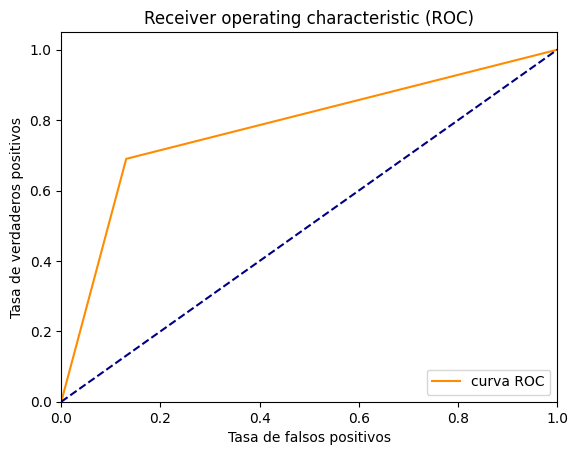

In [148]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# y_true = [1, 1, 1, 0, 1, 0]
# y_pred = [1, 1, 0, 1, 1, 0]
y_true = Y_test
y_pred = Y_pred_DT
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='curva ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Área bajo la curva (AUC)**

In [149]:
from sklearn.metrics import roc_auc_score
area_bajo_curva = roc_auc_score(y_true, y_pred)
print("Área bajo la curva (AUC):",area_bajo_curva)

Área bajo la curva (AUC): 0.7795238095238095


**Tomamos el dataset de test para enviar el submit a Kaggle**

In [150]:
#Vemos la cantidad de filas
test_df.shape


(418, 9)

In [151]:
X_test_Envio  = test_df.drop("PassengerId", axis=1).copy()

Evaluamos el dataset Test con el modelo de Decisión Tree

In [152]:
Y_pred_DT = decision_tree.predict(X_test_Envio)

En esta parte se genera el archivo para enviar a la competencia en Kaggle

In [153]:
Resultado_S_NS = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_DT
    })
Resultado_S_NS.to_csv('Resultado_S_NS.csv', index=False)